# How should I price auto insurance in the United States?

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Your task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases. You will be using the Python `statsmodels` package to create and analyze these linear models.

In [1]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## Diving into the data

In [2]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [3]:
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,5,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,6,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,7,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,8,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,9,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


### Exercise 1:

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

**Answer.**

<AxesSubplot:xlabel='G', ylabel='cost'>

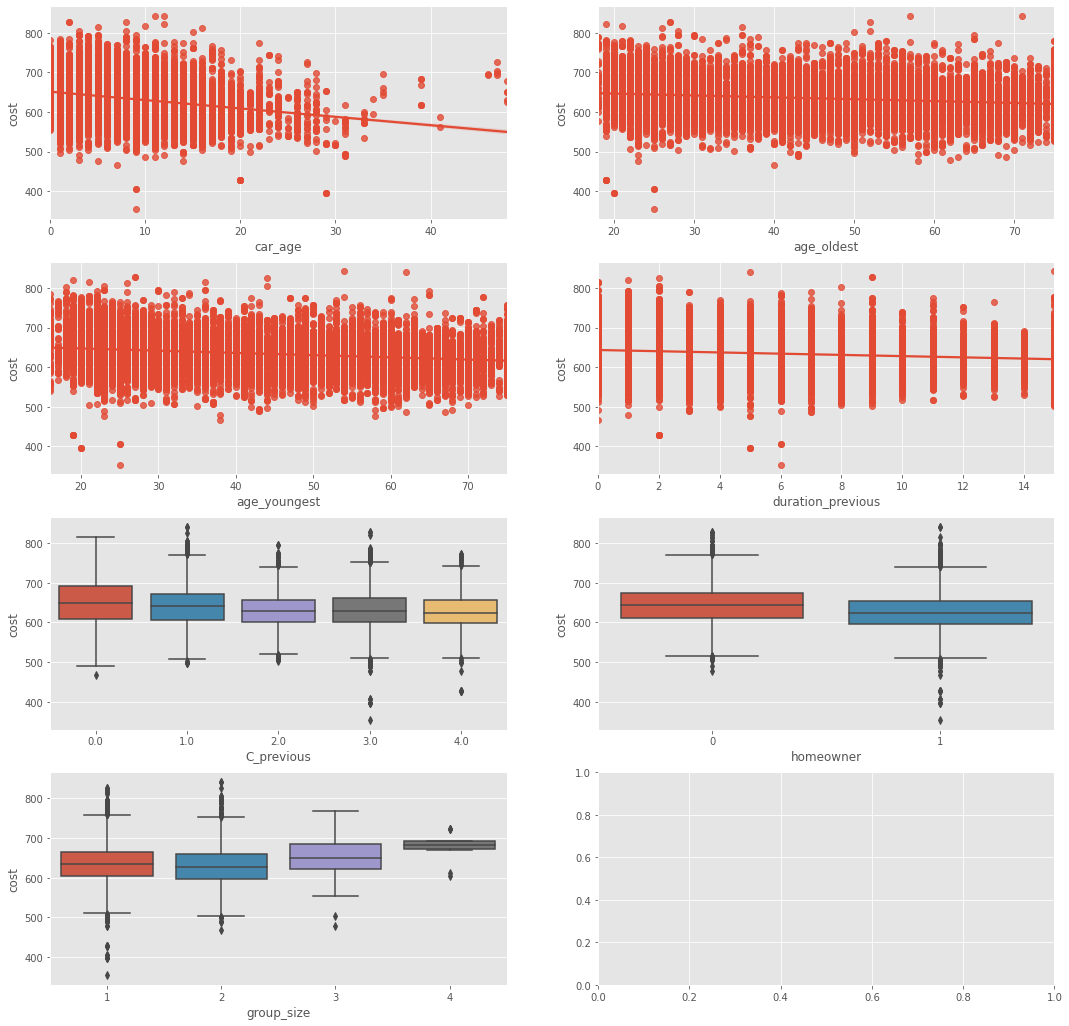

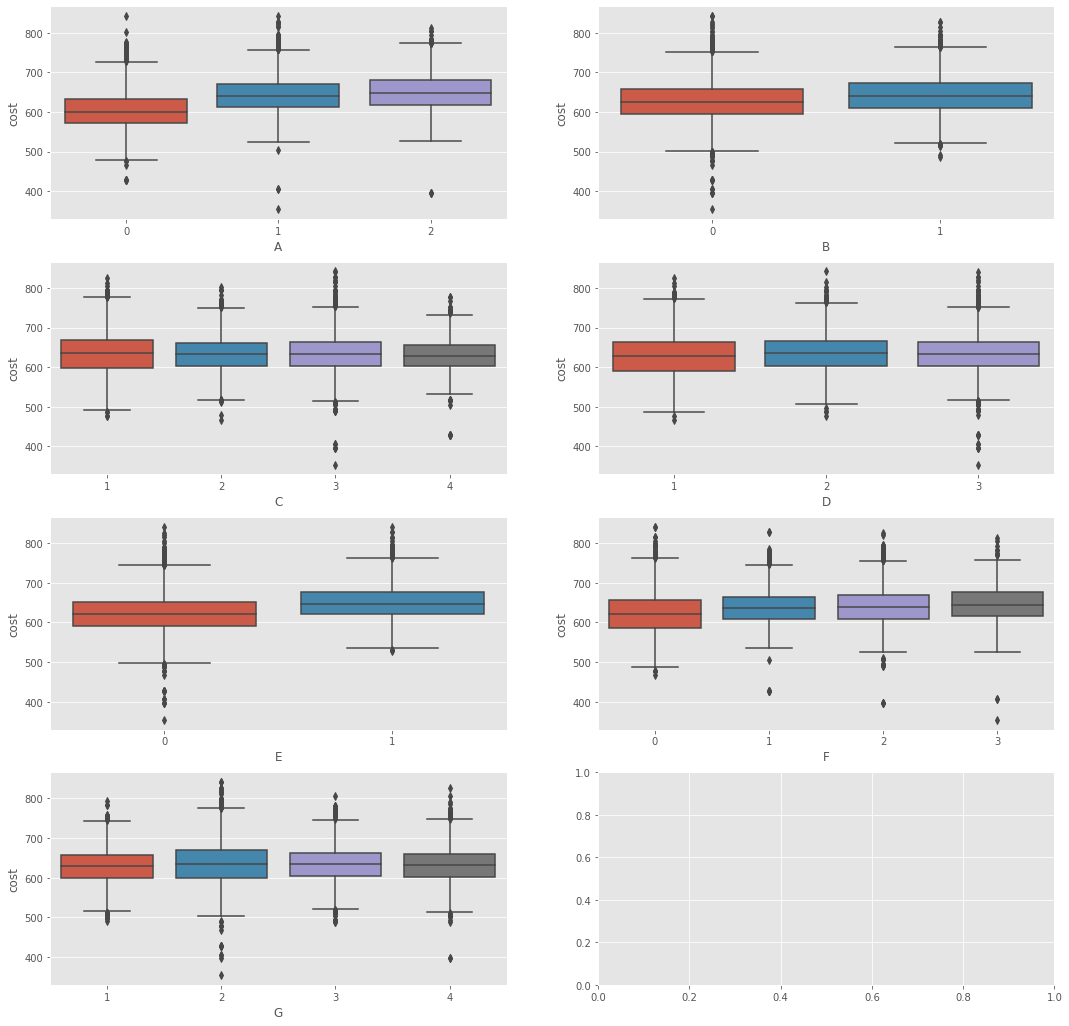

In [4]:
fig, ax=plt.subplots(4,2, figsize=(18,18))
sns.regplot(y="cost", x="car_age", data=df, ax=ax[0][0])
sns.regplot(y='cost', x='age_oldest', data = df, ax=ax[0][1])
sns.regplot(y='cost', x='age_youngest', data=df, ax=ax[1][0])
sns.regplot(y='cost', x='duration_previous', data=df, ax=ax[1][1])
sns.boxplot(y='cost', x='C_previous', data = df, ax=ax[2][0])
sns.boxplot(y='cost', x='homeowner', data=df, ax=ax[2][1])
sns.boxplot(y='cost', x='group_size', data = df, ax=ax[3][0])

fig, ax=plt.subplots(4,2, figsize=(18,18))
sns.boxplot(y='cost', x='A', data = df, ax=ax[0][0])
sns.boxplot(y='cost', x='B', data = df, ax=ax[0][1])
sns.boxplot(y='cost', x='C', data = df, ax=ax[1][0])
sns.boxplot(y='cost', x='D', data = df, ax=ax[1][1])
sns.boxplot(y='cost', x='E', data = df, ax=ax[2][0])
sns.boxplot(y='cost', x='F', data = df, ax=ax[2][1])
sns.boxplot(y='cost', x='G', data = df, ax=ax[3][0])

### Exercise 2:

Convert all categorical data to be in the one-hot encoding format.

**Answer.**

In [5]:
df_dummies=pd.concat([df.state,df.group_size,df.homeowner,df.car_age,df.car_value,df.risk_factor,df.age_oldest,df.age_youngest,
                    df.married_couple,df.C_previous,df.duration_previous,
                    pd.get_dummies(df.A,prefix='A', drop_first=True),
                    pd.get_dummies(df.B,prefix='B', drop_first=True),
                    pd.get_dummies(df.C,prefix='C', drop_first=True),
                    pd.get_dummies(df.D,prefix='D', drop_first=True),
                    pd.get_dummies(df.E,prefix='E', drop_first=True),
                    pd.get_dummies(df.F,prefix='F', drop_first=True),
                    pd.get_dummies(df.G,prefix='G', drop_first=True)],axis=1)
df_dummies.head(5)

,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,...,C_4,D_2,D_3,E_1,F_1,F_2,F_3,G_2,G_3,G_4
0,OK,1,0,9,f,0.0,24,24,0,3.0,...,0,0,0,0,0,0,0,0,0,1
1,OK,1,0,9,f,0.0,24,24,0,3.0,...,0,0,1,1,0,0,1,1,0,0
2,PA,1,1,7,f,0.0,74,74,0,2.0,...,0,0,1,1,0,1,0,1,0,0
3,PA,1,1,7,f,0.0,74,74,0,2.0,...,0,0,1,1,0,1,0,1,0,0
4,AR,1,0,4,d,4.0,26,26,0,3.0,...,0,0,0,0,0,1,0,1,0,0


## Fitting a multiple linear regression

### Exercise 3:

Split your data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

**Answer.**

In [6]:
from sklearn.model_selection import train_test_split
##rename to avoid conflict in next excercise between C as categorical formula and C as series
df=df.rename(columns={'A': 'cat_A','B': 'cat_B','C': 'cat_C','D': 'cat_D','E': 'cat_E','F': 'cat_F','G': 'cat_G'})
train,test= train_test_split(df, test_size=.2, train_size=.8, random_state=1337, shuffle=True, stratify=None)

### Exercise 4:

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`. What is the AIC value?

**Answer.**

In [7]:
formula_all = 'cost ~ state + group_size +C(homeowner)+ car_age + car_value + risk_factor + age_oldest + age_youngest + C(married_couple)+C(C_previous) + duration_previous + C(cat_A) + C(cat_B)+C(cat_C) +C(cat_D) +C(cat_E) + C(cat_F) + C(cat_G)'

model_all = smf.ols(formula = formula_all, data = train)
fitted_all= model_all.fit()
fitted_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     134.9
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:43:40   Log-Likelihood:                -61596.
No. Observations:               12348   AIC:                         1.233e+05
Df Residuals:                   12277   BIC:                         1.239e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                689.3096      8.687     79.348      0.000     672.281     706.338
state[T.AR]                0.9927      3.128      0.317      0.751      -5.138       7.124
state[T.CO]               -9.2995      2.567     -3.623      0.000     -14.330      -4.269
state[T.CT]               30.4289      2.904     10.480      0.000      24.737      36.120
state[T.DC]               40.8660      5.114      7.992      0.000      30.842      50.890
state[T.DE]               39.7634      4.604      8.636      0.000      30.739      48.788
state[T.FL]               12.2195      2.165      5.645      0.000       7.976      16.463
state[T.GA]                8.6698      2.386      3.633      0.000       3.992      13.347
state[T.IA]              -49.6654      3.488    -14.239      0.000     -56.503     -42.828
state[T.ID]              -17.9938      4.152     -4.334      0.000     -26.133      -9.855
state[T.IN]              -11.0649      2.589     -4.274      0.000     -16.139      -5.991
state[T.KS]               -7.5330      4.416     -1.706      0.088     -16.189       1.123
state[T.KY]               19.0070      2.845      6.682      0.000      13.431      24.583
state[T.MD]               23.0788      2.483      9.294      0.000      18.211      27.946
state[T.ME]              -34.1552      4.127     -8.277      0.000     -42.244     -26.067
state[T.MO]              -21.5884      2.931     -7.365      0.000     -27.334     -15.843
state[T.MS]               -2.4205      3.292     -0.735      0.462      -8.873       4.032
state[T.MT]               -8.2816      5.775     -1.434      0.152     -19.601       3.038
state[T.ND]               19.9222      6.144      3.243      0.001       7.879      31.965
state[T.NE]              -14.2295      5.294     -2.688      0.007     -24.608      -3.851
state[T.NH]              -20.7629      3.797     -5.469      0.000     -28.205     -13.321
state[T.NM]               -1.8664      3.729     -0.501      0.617      -9.175       5.442
state[T.NV]               22.6669      2.791      8.120      0.000      17.195      28.138
state[T.NY]               38.0859      2.443     15.590      0.000      33.297      42.874
state[T.OH]               -7.3013      2.314     -3.155      0.002     -11.838      -2.765
state[T.OK]              -10.9994      2.708     -4.062      0.000     -16.307      -5.692
state[T.OR]               -5.0998      2.826     -1.805      0.071     -10.639       0.439
state[T.PA]                9.3107      2.202      4.229      0.000       4.995      13.626
state[T.RI]               26.1128      4.271      6.113      0.000      17.740      34.485
state[T.SD]              -17.5942     14.683     -1.198      0.231     -46.375      11.186
state[T.TN]              -10.9766      2.607     -4.211      0.000     -16.086  

#### 4.2 

According to `model_all`, which states are most and least expensive?

**Answer.**

DC is the most expensive and IA is the least

#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

**Answer.**

group size: makes sense, the more people the more expensive it becomes
homeowner: need more information, people without a home may be more exposed to risks? seek help from an expert
car age: doesn't make sense, why is it that the older the car i have to pay less? shoulnd't an old car malfunction more often than a new car?
risk_factor: doesn't make sense, why people with more risk pay less?
age_oldest: makes sense, having an older person in the family could lead to more risk to illness and health problems, the are charged more
age_youngest: makes sense, having older people in the family could lead to more risk to illness and health problems, the are charged more
married couple: need more information, why married people are charged less? it should be the same
duration_previous: makes sense, loyal clients could be charged less as the company knows their risks factors more than the newly adquire clients which are less known

### Exercise 5:

Which variables from `model_all` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

**Answer.**

In [8]:
# the only satistically insignificant was groupsize,Cat_C and Cat_D
formula_sig = 'cost ~ state +C(homeowner)+ car_age + car_value + risk_factor + age_oldest + age_youngest + C(married_couple)+C(C_previous) + duration_previous + C(cat_A) + C(cat_B) +C(cat_E) + C(cat_F) + C(cat_G)'
model_sig = smf.ols(formula = formula_sig, data = train)
fitted_sig= model_sig.fit()
fitted_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     147.3
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:43:52   Log-Likelihood:                -61602.
No. Observations:               12348   AIC:                         1.233e+05
Df Residuals:                   12283   BIC:                         1.238e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                692.3926      8.539     81.089      0.000     675.655     709.130
state[T.AR]                1.0026      3.117      0.322      0.748      -5.106       7.111
state[T.CO]               -9.6656      2.553     -3.786      0.000     -14.670      -4.661
state[T.CT]               29.6927      2.882     10.301      0.000      24.043      35.343
state[T.DC]               40.2512      5.107      7.881      0.000      30.240      50.262
state[T.DE]               39.6201      4.600      8.612      0.000      30.603      48.637
state[T.FL]               11.6178      2.149      5.406      0.000       7.405      15.831
state[T.GA]                8.8728      2.352      3.772      0.000       4.262      13.484
state[T.IA]              -49.8457      3.473    -14.354      0.000     -56.653     -43.039
state[T.ID]              -17.9876      4.149     -4.335      0.000     -26.121      -9.854
state[T.IN]              -11.1930      2.581     -4.337      0.000     -16.252      -6.134
state[T.KS]               -7.5542      4.410     -1.713      0.087     -16.199       1.090
state[T.KY]               18.4558      2.838      6.502      0.000      12.892      24.020
state[T.MD]               23.1088      2.481      9.315      0.000      18.246      27.971
state[T.ME]              -34.6151      4.112     -8.418      0.000     -42.676     -26.555
state[T.MO]              -21.9002      2.923     -7.492      0.000     -27.630     -16.170
state[T.MS]               -2.5244      3.277     -0.770      0.441      -8.947       3.898
state[T.MT]               -8.7182      5.768     -1.512      0.131     -20.024       2.588
state[T.ND]               19.4056      6.118      3.172      0.002       7.414      31.397
state[T.NE]              -14.2178      5.294     -2.686      0.007     -24.594      -3.841
state[T.NH]              -21.2098      3.789     -5.598      0.000     -28.637     -13.783
state[T.NM]               -1.9531      3.718     -0.525      0.599      -9.241       5.334
state[T.NV]               21.9613      2.775      7.913      0.000      16.521      27.401
state[T.NY]               37.7720      2.418     15.618      0.000      33.031      42.512
state[T.OH]               -7.6845      2.305     -3.334      0.001     -12.203      -3.166
state[T.OK]              -11.2190      2.705     -4.148      0.000     -16.520      -5.918
state[T.OR]               -5.3042      2.823     -1.879      0.060     -10.838       0.229
state[T.PA]                8.9990      2.197      4.096      0.000       4.693      13.305
state[T.RI]               25.9115      4.270      6.068      0.000      17.541      34.282
state[T.SD]              -18.2660     14.679     -1.244      0.213     -47.040      10.508
state[T.TN]              -10.9547      2.605     -4.205      0.000     -16.061  

### Exercise 6:

In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

**Answer.**

In [9]:
formula_sig_plus = 'cost ~ state +C(homeowner)+ car_age + car_value + risk_factor + age_oldest + age_youngest + C(married_couple)+C(C_previous) + duration_previous + C(cat_A) + C(cat_B) +C(cat_E) + C(cat_F) + C(cat_G) + I(age_youngest**2)+ I(car_age**2) + car_age * age_youngest'
model_sig_plus = smf.ols(formula = formula_sig_plus, data = train)
fitted_sig_plus= model_sig_plus.fit()
fitted_sig_plus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     149.9
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:44:07   Log-Likelihood:                -61429.
No. Observations:               12348   AIC:                         1.230e+05
Df Residuals:                   12280   BIC:                         1.235e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                707.0052     10.181     69.446      0.000     687.050     726.961
state[T.AR]                0.6699      3.074      0.218      0.828      -5.357       6.696
state[T.CO]               -7.9783      2.520     -3.166      0.002     -12.919      -3.038
state[T.CT]               31.9979      2.846     11.245      0.000      26.420      37.575
state[T.DC]               43.6758      5.044      8.659      0.000      33.789      53.563
state[T.DE]               38.8311      4.556      8.523      0.000      29.901      47.762
state[T.FL]               10.9611      2.121      5.168      0.000       6.804      15.119
state[T.GA]                9.6995      2.322      4.177      0.000       5.148      14.251
state[T.IA]              -49.2478      3.426    -14.374      0.000     -55.964     -42.532
state[T.ID]              -18.6534      4.094     -4.556      0.000     -26.678     -10.629
state[T.IN]              -10.9446      2.546     -4.298      0.000     -15.936      -5.953
state[T.KS]               -8.1529      4.350     -1.874      0.061     -16.679       0.373
state[T.KY]               19.8710      2.802      7.093      0.000      14.379      25.363
state[T.MD]               24.9703      2.449     10.195      0.000      20.169      29.771
state[T.ME]              -32.8606      4.057     -8.100      0.000     -40.813     -24.908
state[T.MO]              -22.4555      2.884     -7.787      0.000     -28.108     -16.803
state[T.MS]               -1.2550      3.232     -0.388      0.698      -7.591       5.081
state[T.MT]              -10.3762      5.689     -1.824      0.068     -21.528       0.776
state[T.ND]               19.1388      6.040      3.168      0.002       7.299      30.979
state[T.NE]              -14.6556      5.222     -2.806      0.005     -24.892      -4.419
state[T.NH]              -21.8792      3.739     -5.852      0.000     -29.208     -14.550
state[T.NM]               -3.0928      3.684     -0.840      0.401     -10.314       4.129
state[T.NV]               22.9725      2.739      8.388      0.000      17.604      28.341
state[T.NY]               39.4142      2.387     16.513      0.000      34.735      44.093
state[T.OH]               -7.4708      2.273     -3.286      0.001     -11.927      -3.015
state[T.OK]              -11.7037      2.669     -4.385      0.000     -16.936      -6.472
state[T.OR]               -4.8612      2.785     -1.746      0.081     -10.320       0.598
state[T.PA]               10.0258      2.167      4.626      0.000       5.778      14.274
state[T.RI]               23.6223      4.214      5.606      0.000      15.363      31.882
state[T.SD]              -11.7103     14.482     -0.809      0.419     -40.097      16.676
state[T.TN]              -10.4444      2.570     -4.065      0.000     -15.481  

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [10]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


### Exercise 7:

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

**Answer.**

In [11]:

state_dict=state_regions.set_index('State Code')['Region'].to_dict()
df['region']=df['state']
print(state_dict)
df['region']=df['region'].map(state_dict)
df.head(10)

{'AK': 'West', 'AL': 'South', 'AR': 'South', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'CT': 'Northeast', 'DC': 'South', 'DE': 'South', 'FL': 'South', 'GA': 'South', 'HI': 'West', 'IA': 'Midwest', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'KS': 'Midwest', 'KY': 'South', 'LA': 'South', 'MA': 'Northeast', 'MD': 'South', 'ME': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'MS': 'South', 'MT': 'West', 'NC': 'South', 'ND': 'Midwest', 'NE': 'Midwest', 'NH': 'Northeast', 'NJ': 'Northeast', 'NM': 'West', 'NV': 'West', 'NY': 'Northeast', 'OH': 'Midwest', 'OK': 'South', 'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South', 'SD': 'Midwest', 'TN': 'South', 'TX': 'South', 'UT': 'West', 'VA': 'South', 'VT': 'Northeast', 'WA': 'West', 'WI': 'Midwest', 'WV': 'South', 'WY': 'West'}


,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,duration_previous,cat_A,cat_B,cat_C,cat_D,cat_E,cat_F,cat_G,cost,region
0,0,OK,1,0,9,f,0.0,24,24,0,...,9.0,0,0,1,1,0,0,4,543,South
1,1,OK,1,0,9,f,0.0,24,24,0,...,9.0,2,1,1,3,1,3,2,611,South
2,2,PA,1,1,7,f,0.0,74,74,0,...,15.0,2,0,2,3,1,2,2,691,Northeast
3,3,PA,1,1,7,f,0.0,74,74,0,...,15.0,2,0,2,3,1,2,2,695,Northeast
4,4,AR,1,0,4,d,4.0,26,26,0,...,1.0,1,0,1,1,0,2,2,628,South
5,5,AR,1,0,4,d,4.0,26,26,0,...,1.0,1,0,2,1,0,2,2,625,South
6,6,AR,1,0,4,d,4.0,26,26,0,...,1.0,1,0,2,1,0,2,2,628,South
7,7,OK,1,0,13,f,3.0,22,22,0,...,0.0,0,0,1,1,0,0,2,596,South
8,8,OK,1,0,13,f,3.0,22,22,0,...,0.0,2,0,1,1,0,3,2,711,South
9,9,OK,1,0,13,f,3.0,22,22,0,...,0.0,2,0,1,1,0,3,2,722,South


#### 7.2

Fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

**Answer.**

In [12]:
#since we changed the original dataframe we should re calculate the splits with the new column
train,test= train_test_split(df, test_size=.2, train_size=.8, random_state=1337, shuffle=True, stratify=None)

formula_region = 'cost ~ region +C(homeowner)+ car_age + car_value + risk_factor + age_oldest + age_youngest + C(married_couple)+C(C_previous) + duration_previous + C(cat_A) + C(cat_B) +C(cat_E) + C(cat_F) + C(cat_G) + I(age_youngest**2)+ I(car_age**2) + car_age * age_youngest'
model_region = smf.ols(formula = formula_region, data = train)
fitted_region= model_region.fit()
fitted_region.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     212.9
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:44:13   Log-Likelihood:                -62197.
No. Observations:               12348   AIC:                         1.245e+05
Df Residuals:                   12312   BIC:                         1.247e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                692.0498     10.669     64.864      0.000     671.136     712.963
region[T.Northeast]       31.4598      1.230     25.572      0.000      29.048      33.871
region[T.South]           23.1773      1.020     22.726      0.000      21.178      25.176
region[T.West]            13.8859      1.188     11.684      0.000      11.556      16.216
C(homeowner)[T.1]        -13.7849      0.757    -18.217      0.000     -15.268     -12.302
car_value[T.b]           -53.1214     11.465     -4.633      0.000     -75.595     -30.647
car_value[T.c]           -33.8181     10.188     -3.320      0.001     -53.787     -13.849
car_value[T.d]           -28.7578     10.260     -2.803      0.005     -48.869      -8.646
car_value[T.e]           -28.2582     10.261     -2.754      0.006     -48.371      -8.145
car_value[T.f]           -27.2230     10.275     -2.649      0.008     -47.365      -7.081
car_value[T.g]           -22.9168     10.301     -2.225      0.026     -43.108      -2.726
car_value[T.h]           -15.0911     10.380     -1.454      0.146     -35.437       5.254
car_value[T.i]            10.8950     11.195      0.973      0.330     -11.049      32.839
C(married_couple)[T.1]    -7.5821      0.885     -8.566      0.000      -9.317      -5.847
C(C_previous)[T.1.0]      -5.9273      1.714     -3.458      0.001      -9.287      -2.568
C(C_previous)[T.2.0]     -15.4838      1.828     -8.471      0.000     -19.066     -11.901
C(C_previous)[T.3.0]     -19.7369      1.708    -11.553      0.000     -23.086     -16.388
C(C_previous)[T.4.0]     -27.8662      1.871    -14.891      0.000     -31.534     -24.198
C(cat_A)[T.1]             40.5635      1.397     29.031      0.000      37.825      43.302
C(cat_A)[T.2]             46.5549      1.719     27.079      0.000      43.185      49.925
C(cat_B)[T.1]              1.5900      0.808      1.968      0.049       0.007       3.173
C(cat_E)[T.1]             11.3706      0.897     12.671      0.000       9.612      13.129
C(cat_F)[T.1]             -4.3132      1.327     -3.249      0.001      -6.915      -1.711
C(cat_F)[T.2]             -3.2959      1.290     -2.556      0.011      -5.824      -0.768
C(cat_F)[T.3]             -8.4807      2.172     -3.904      0.000     -12.738      -4.223
C(cat_G)[T.2]             11.3988      0.924     12.334      0.000       9.587      13.210
C(cat_G)[T.3]              6.9402      1.052      6.597      0.000       4.878       9.002
C(cat_G)[T.4]              8.0553      1.261      6.386      0.000       5.583      10.528
car_age                   -1.6805      0.220     -7.629      0.000      -2.112      -1.249
risk_factor                0.4167      0.225      1.848      0.065      -0.025       0.859
age_oldest                 0.5230      0.053      9.847      0.000       0.419  

### Exercise 8:

#### 8.1

What should we do next to minimize features?

**Answer.**

Its possible to group some features like the categories and the car values so we would get less features

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model_region`, except for the three we added in Exercise 6, which exhibit multicollinearity. **Hint:** consider looking at correlations.

**Answer.**

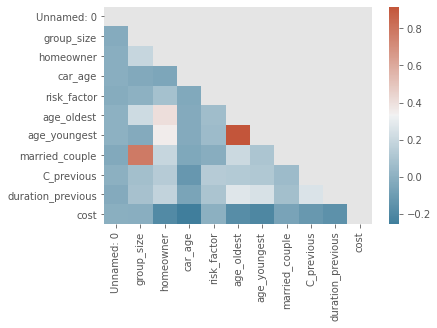

In [13]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap,mask=mask);

Age_oldest and age_ youngest are highly correlated we can drop either

#### 8.3:

Refit `model_region` after dropping these redundant predictor(s); call this `model_region_no_oldest`.

**Answer.**

In [14]:
formula_region_no_oldest = 'cost ~ region +C(homeowner)+ car_age + car_value + risk_factor +  age_youngest + C(married_couple)+C(C_previous) + duration_previous + C(cat_A) + C(cat_B) +C(cat_E) + C(cat_F) + C(cat_G) + I(age_youngest**2)+ I(car_age**2) + car_age * age_youngest'
model_region_no_oldest = smf.ols(formula = formula_region_no_oldest, data = train)
fitted_region_no_oldest= model_region_no_oldest.fit()
fitted_region_no_oldest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     214.6
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:44:20   Log-Likelihood:                -62245.
No. Observations:               12348   AIC:                         1.246e+05
Df Residuals:                   12313   BIC:                         1.248e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                698.6256     10.690     65.355      0.000     677.672     719.579
region[T.Northeast]       31.6041      1.235     25.591      0.000      29.183      34.025
region[T.South]           23.4186      1.024     22.881      0.000      21.412      25.425
region[T.West]            14.1254      1.193     11.842      0.000      11.787      16.464
C(homeowner)[T.1]        -12.4191      0.747    -16.630      0.000     -13.883     -10.955
car_value[T.b]           -53.9525     11.510     -4.688      0.000     -76.513     -31.392
car_value[T.c]           -33.8688     10.227     -3.312      0.001     -53.916     -13.822
car_value[T.d]           -28.7413     10.300     -2.790      0.005     -48.931      -8.551
car_value[T.e]           -28.3388     10.301     -2.751      0.006     -48.530      -8.147
car_value[T.f]           -27.5879     10.315     -2.674      0.007     -47.808      -7.368
car_value[T.g]           -23.5342     10.341     -2.276      0.023     -43.803      -3.265
car_value[T.h]           -15.6106     10.420     -1.498      0.134     -36.035       4.814
car_value[T.i]            10.2813     11.238      0.915      0.360     -11.747      32.310
C(married_couple)[T.1]    -5.3437      0.859     -6.223      0.000      -7.027      -3.660
C(C_previous)[T.1.0]      -6.3988      1.720     -3.721      0.000      -9.770      -3.028
C(C_previous)[T.2.0]     -16.2203      1.833     -8.847      0.000     -19.814     -12.627
C(C_previous)[T.3.0]     -20.1437      1.715    -11.749      0.000     -23.504     -16.783
C(C_previous)[T.4.0]     -28.3999      1.878    -15.124      0.000     -32.081     -24.719
C(cat_A)[T.1]             40.5979      1.403     28.943      0.000      37.848      43.347
C(cat_A)[T.2]             46.5562      1.726     26.975      0.000      43.173      49.939
C(cat_B)[T.1]              1.7123      0.811      2.112      0.035       0.123       3.302
C(cat_E)[T.1]             11.4910      0.901     12.757      0.000       9.725      13.257
C(cat_F)[T.1]             -4.5701      1.332     -3.430      0.001      -7.182      -1.959
C(cat_F)[T.2]             -3.4160      1.295     -2.639      0.008      -5.954      -0.878
C(cat_F)[T.3]             -8.2277      2.180     -3.774      0.000     -12.501      -3.954
C(cat_G)[T.2]             11.5241      0.928     12.423      0.000       9.706      13.342
C(cat_G)[T.3]              6.9804      1.056      6.609      0.000       4.910       9.051
C(cat_G)[T.4]              8.0648      1.266      6.369      0.000       5.583      10.547
car_age                   -1.6375      0.221     -7.406      0.000      -2.071      -1.204
risk_factor                0.4605      0.226      2.035      0.042       0.017       0.904
age_youngest              -2.5160      0.129    -19.573      0.000      -2.768  

#### 8.4

What would you do to diagnose the `model_region_no_oldest` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)

**Answer.**

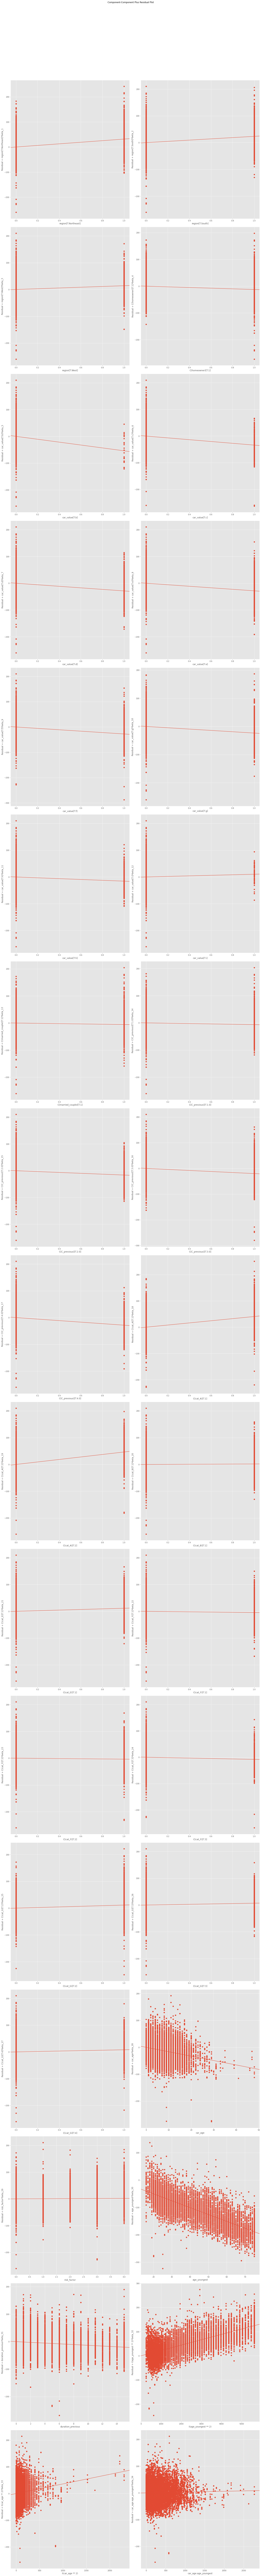

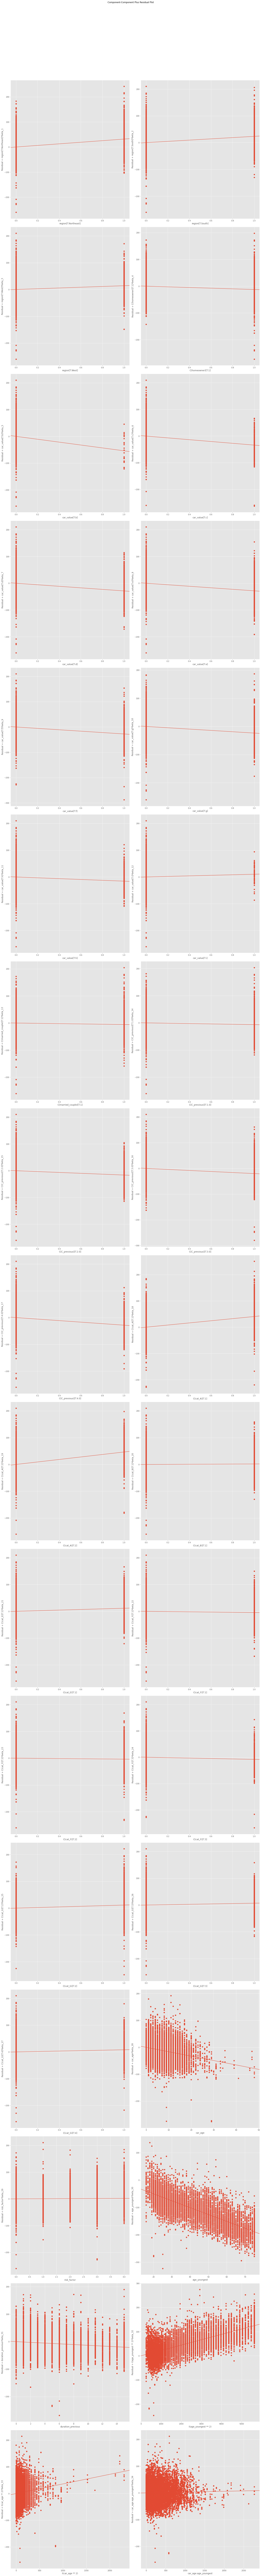

In [15]:
fig = plt.figure(figsize=(20, 200))
sm.graphics.plot_ccpr_grid(fitted_region_no_oldest,grid=(17,2),fig=fig)

It suggest that the fit is good enough but some features could be dropped

### Exercise 9:

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model_region_no_oldest`. What value do you get?

**Answer.**

#### 9.2

Refit `model_region_no_oldest`, but now with the transformation as suggested by the Box-Cox. Call it `model_region_no_oldest_box_cox`.

**Answer.**

-------

## Conclusion

In this, you practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. You excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 